# Data Exploration & Preparation

## Importing Modules

In [1]:
#importing basic modules
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration

### Data Train & Data Test 

In [2]:
data_train = pd.read_csv('raw_data/train.csv')

In [3]:
data_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
data_test = pd.read_csv('raw_data/test.csv')

In [5]:
data_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


### X_train & y_train

In [6]:
X_train = data_train.drop(columns = 'target')

In [7]:
y_train = data_train['target']
y_train

0         0
1         0
2         0
3         0
4         1
         ..
299995    0
299996    0
299997    1
299998    0
299999    0
Name: target, Length: 300000, dtype: int64

### Checking for duplicates

In [8]:
len(X_train) # Check number of rows before removing duplicates - no duplicates

300000

### Null Values

In [9]:
X_train.isnull().sum().sort_values(ascending=False) #NaN count for each column

id        0
cat15     0
cont9     0
cont8     0
cont7     0
cont6     0
cont5     0
cont4     0
cont3     0
cont2     0
cont1     0
cont0     0
cat18     0
cat17     0
cat16     0
cat14     0
cat0      0
cat13     0
cat12     0
cat11     0
cat10     0
cat9      0
cat8      0
cat7      0
cat6      0
cat5      0
cat4      0
cat3      0
cat2      0
cat1      0
cont10    0
dtype: int64

### Checking Cat and Num values

In [10]:
num_cols = X_train._get_numeric_data().columns

In [11]:
len(num_cols)

12

In [12]:
num_cols

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10'],
      dtype='object')

In [13]:
num_cols = num_cols.drop('id')

In [14]:
num_cols

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10'],
      dtype='object')

In [15]:
cat_cols = list(set(X_train) - set(num_cols))

In [16]:
cat_cols 

['cat9',
 'cat16',
 'cat8',
 'cat0',
 'cat14',
 'cat17',
 'cat18',
 'cat6',
 'cat1',
 'cat3',
 'cat5',
 'id',
 'cat7',
 'cat11',
 'cat10',
 'cat4',
 'cat12',
 'cat15',
 'cat2',
 'cat13']

In [17]:
cat_cols.remove('id')

In [18]:
cat_cols

['cat9',
 'cat16',
 'cat8',
 'cat0',
 'cat14',
 'cat17',
 'cat18',
 'cat6',
 'cat1',
 'cat3',
 'cat5',
 'cat7',
 'cat11',
 'cat10',
 'cat4',
 'cat12',
 'cat15',
 'cat2',
 'cat13']

In [19]:
data_cat = data_train[cat_cols]
data_cat

,cat9,cat16,cat8,cat0,cat14,cat17,cat18,cat6,cat1,cat3,cat5,cat7,cat11,cat10,cat4,cat12,cat15,cat2,cat13
0,A,D,Q,A,A,D,B,A,I,B,BI,S,A,LO,B,A,B,A,A
1,F,B,AD,A,B,D,B,K,I,A,BI,W,A,HJ,E,B,D,A,A
2,L,D,BM,A,A,D,B,A,K,A,BI,E,A,DJ,E,B,B,A,A
3,F,D,AD,A,A,D,B,A,K,C,BI,Y,A,KV,E,A,B,A,A
4,A,B,Q,A,B,D,B,C,I,B,BI,G,A,DP,E,A,B,G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,B,K,A,B,D,B,A,N,A,BU,AS,A,HG,E,A,D,F,A
299996,E,D,AE,A,B,D,B,A,K,A,BI,K,A,HK,G,B,B,A,A
299997,A,B,F,A,B,D,D,C,G,A,BI,L,B,HC,H,A,D,M,A
299998,A,A,AX,B,A,D,A,A,H,D,BI,AA,A,BF,B,A,B,A,A


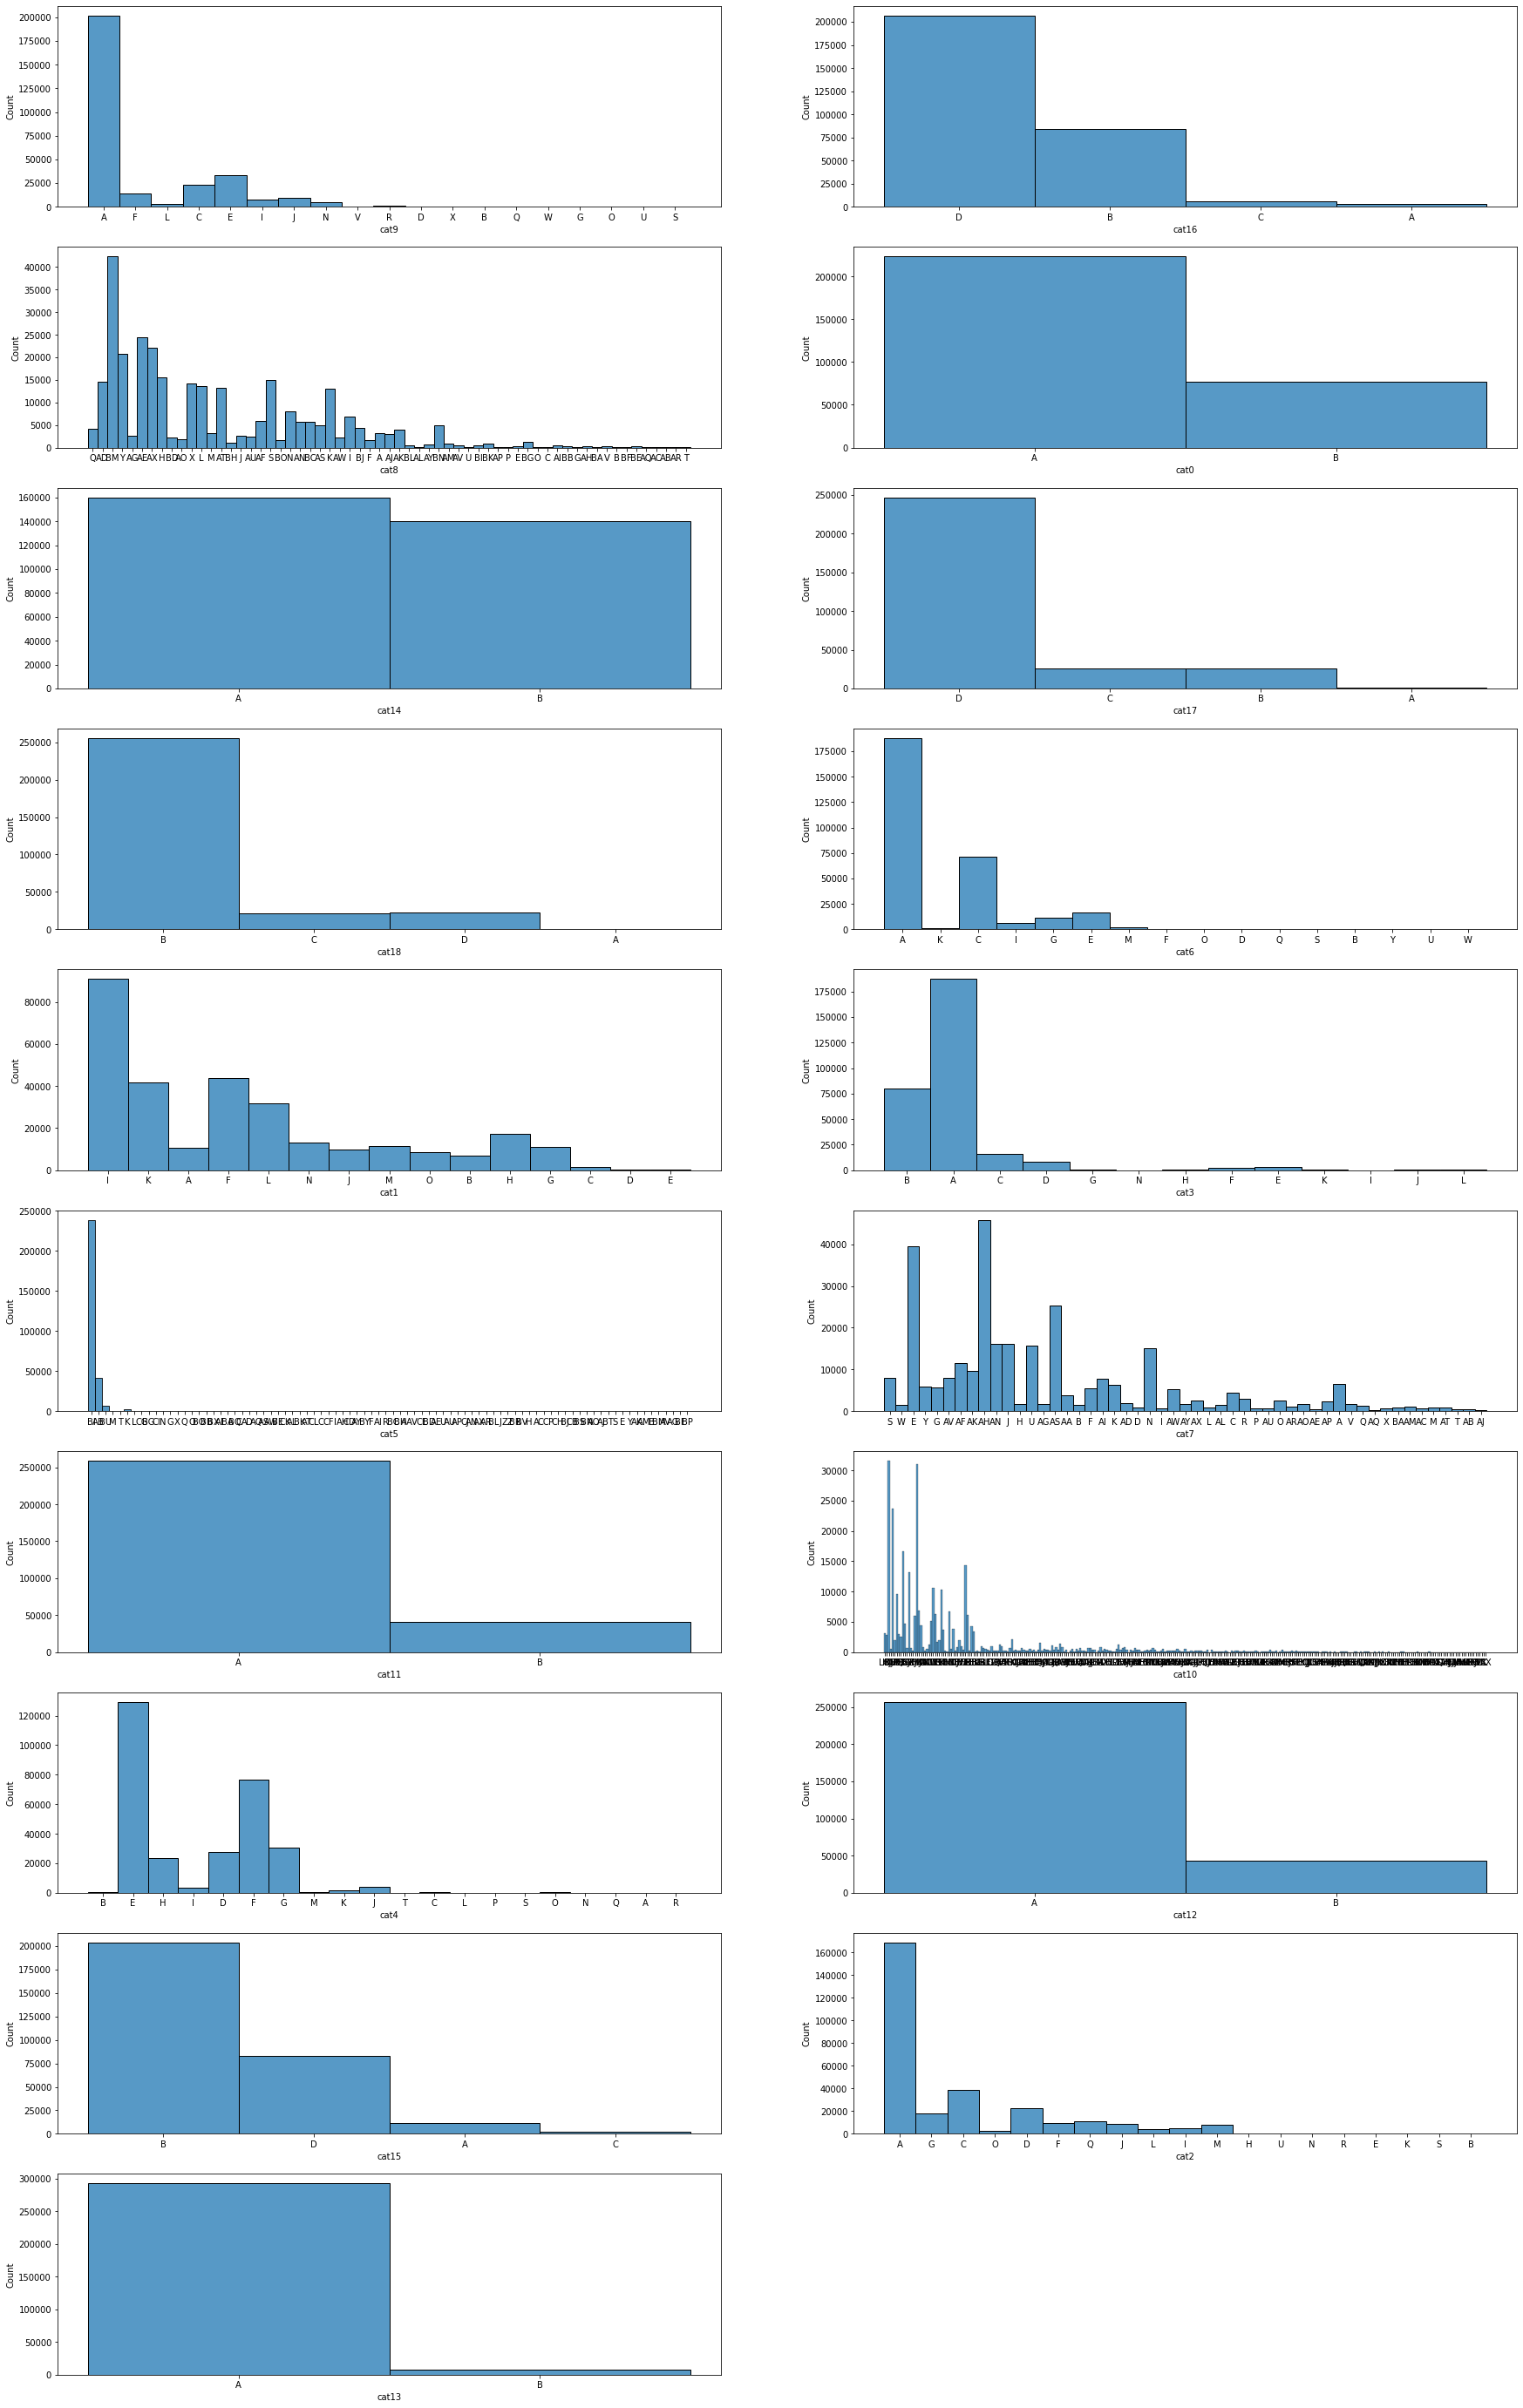

In [20]:
plt.figure(figsize=(30,50))
for index, cat in enumerate(cat_cols):
    index += 1
    plt.subplot(10,2,index)
    x = data_train[cat]
    sns.histplot(x)

### Correlation Matrix

<AxesSubplot:>

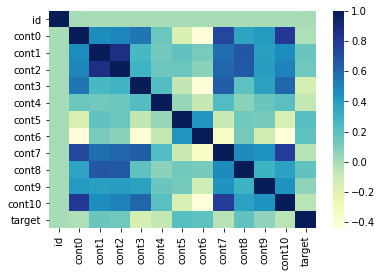

In [21]:
# Heatmap
corr = data_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

## Feature Removal

### Correlation Feature Removal 

<AxesSubplot:>

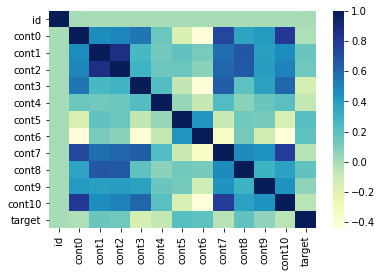

In [22]:
corr = data_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [23]:
X_train = X_train.drop(columns=['cont2','cont7','cont10','id'])

In [24]:
X_train.shape

(300000, 27)

In [25]:
num_cols = X_train._get_numeric_data().columns
num_cols

Index(['cont0', 'cont1', 'cont3', 'cont4', 'cont5', 'cont6', 'cont8', 'cont9'], dtype='object')

In [26]:
X_train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat17,cat18,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9
0,A,I,A,B,B,BI,A,S,Q,A,...,D,B,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006
1,A,I,A,A,E,BI,K,W,AD,F,...,D,B,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406
2,A,K,A,A,E,BI,A,E,BM,L,...,D,B,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696
3,A,K,A,C,E,BI,A,Y,AD,F,...,D,B,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318
4,A,I,G,B,E,BI,C,G,Q,A,...,D,B,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,...,D,B,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436
299996,A,K,A,A,G,BI,A,K,AE,E,...,D,B,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743
299997,A,G,M,A,H,BI,C,L,F,A,...,D,D,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024
299998,B,H,A,D,B,BI,A,AA,AX,A,...,D,A,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453


### Categorical Feature Reduction 

In [27]:
# count different values/levels
cat10_freq = X_train.cat10.value_counts()
print(cat10_freq)

DJ    31584
HK    30998
DP    23679
GS    16619
CR    14382
      ...  
IL        1
BA        1
MR        1
GG        1
MK        1
Name: cat10, Length: 299, dtype: int64


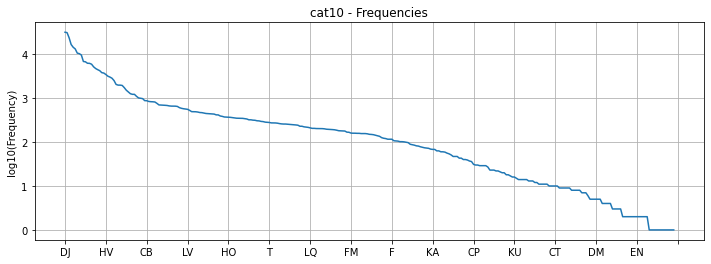

In [28]:
# and plot frequency distribution using log scale
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.log10(cat10_freq))
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title('cat10 - Frequencies')
plt.ylabel('log10(Frequency)')
plt.grid()
plt.show()

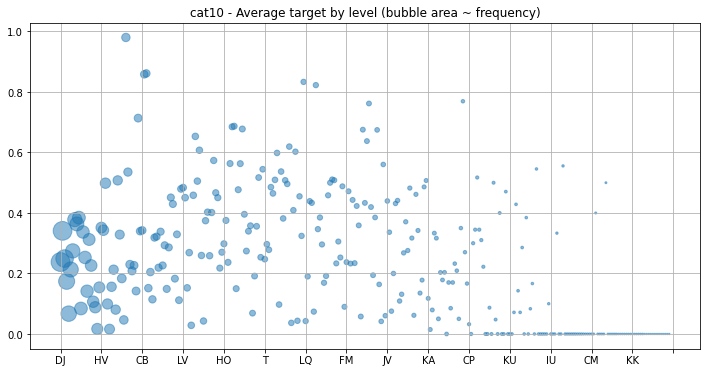

In [29]:
# evaluate mean of target by level
cat10_target = data_train.groupby(['cat10']).agg({
    'target' : ['mean','count']})
# ... and sort by frequency of level
cat10_target = cat10_target.sort_values([('target','count')], ascending=False)

# plot mean of target by level; bubble area ~ frequency
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(cat10_target.index, cat10_target[('target','mean')],
           s=2*np.sqrt(cat10_target[('target','count')]),
           alpha = 0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
plt.title('cat10 - Average target by level (bubble area ~ frequency)')
plt.grid()
plt.show()

In [30]:
# let's give it a try: define levels to be kept
n_keep = 150
cat10_keep = cat10_freq[0:n_keep].index.tolist()
print(cat10_keep)

['DJ', 'HK', 'DP', 'GS', 'CR', 'HX', 'CK', 'DC', 'HQ', 'MD', 'LN', 'LF', 'IE', 'LM', 'KW', 'HG', 'IG', 'HB', 'DF', 'LB', 'HV', 'LO', 'HC', 'HJ', 'EK', 'GC', 'LY', 'GE', 'GK', 'CS', 'MJ', 'HH', 'CD', 'MC', 'HA', 'GQ', 'LI', 'KB', 'GI', 'JW', 'CB', 'JR', 'FR', 'R', 'JG', 'AV', 'GU', 'CU', 'FS', 'HL', 'BY', 'JD', 'FN', 'IJ', 'HN', 'MG', 'JK', 'MB', 'KV', 'BF', 'LV', 'EQ', 'BV', 'IX', 'AD', 'EV', 'V', 'DI', 'JX', 'IK', 'BM', 'KC', 'IA', 'BL', 'JT', 'FI', 'FC', 'CC', 'I', 'DO', 'HO', 'MT', 'AU', 'JH', 'J', 'JO', 'P', 'BC', 'AP', 'EY', 'MH', 'IV', 'LU', 'DY', 'BI', 'AE', 'LW', 'FO', 'FP', 'BP', 'T', 'AA', 'AN', 'KX', 'IO', 'LE', 'AB', 'GA', 'JP', 'LX', 'IR', 'AT', 'E', 'O', 'KF', 'AH', 'JN', 'DQ', 'FL', 'FT', 'LQ', 'JI', 'D', 'KS', 'GB', 'FJ', 'IB', 'MF', 'W', 'C', 'AS', 'BB', 'KH', 'JY', 'G', 'DV', 'JA', 'AR', 'KL', 'BG', 'FM', 'HE', 'EI', 'FK', 'AY', 'IT', 'EL', 'AM', 'MV', 'BT']


In [31]:
# add new column with reduced number of levels
X_train['cat10_reduced'] = X_train.cat10.where(X_train.cat10.isin(cat10_keep), '_OTHER_')
X_train.cat10_reduced.value_counts()

DJ    31584
HK    30998
DP    23679
GS    16619
CR    14382
      ...  
EL      156
AM      156
IT      156
MV      154
BT      150
Name: cat10_reduced, Length: 151, dtype: int64

In [32]:
X_train[X_train.cat10_reduced=='_OTHER_'].cat10_reduced.value_counts()

_OTHER_    5106
Name: cat10_reduced, dtype: int64

In [33]:
# same for test set!
data_test['cat10_reduced'] = data_test.cat10.where(data_test.cat10.isin(cat10_keep), '_OTHER_')
data_test.cat10_reduced.value_counts()

DJ    21166
HK    20559
DP    15732
GS    10992
CR     9559
      ...  
AY      102
IT      100
MV       90
BT       89
AM       87
Name: cat10_reduced, Length: 151, dtype: int64

In [34]:
cat_cols = ['cat0', 'cat1', 'cat2', 'cat3',
                'cat4', 'cat5', 'cat6', 'cat7',
                'cat8', 'cat9', 'cat10_reduced', 'cat11',
                'cat12', 'cat13', 'cat14', 'cat15',
                'cat16', 'cat17', 'cat18']

## Preprocessing

### One Hot Encoding

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
X_train[cat_cols]

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10_reduced,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18
0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B
1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B
2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B
3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B
4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,HG,A,A,A,B,D,B,D,B
299996,A,K,A,A,G,BI,A,K,AE,E,HK,A,B,A,B,B,D,D,B
299997,A,G,M,A,H,BI,C,L,F,A,HC,B,A,A,B,D,B,D,D
299998,B,H,A,D,B,BI,A,AA,AX,A,BF,A,A,A,A,B,A,D,A


In [37]:
# Encode categorical variables
def one_hot_encoding(X):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X[cat_cols])
    return pd.DataFrame(ohe.transform(X).toarray())

In [38]:
X_cat_ohe = one_hot_encoding(X_train[cat_cols])

In [39]:
X_cat_ohe

,0,1,2,3,4,5,6,7,8,9,...,465,466,467,468,469,470,471,472,473,474
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
299996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
299997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
299998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [40]:
num_cols

Index(['cont0', 'cont1', 'cont3', 'cont4', 'cont5', 'cont6', 'cont8', 'cont9'], dtype='object')

In [41]:
X_train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat18,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9,cat10_reduced
0,A,I,A,B,B,BI,A,S,Q,A,...,B,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006,LO
1,A,I,A,A,E,BI,K,W,AD,F,...,B,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406,HJ
2,A,K,A,A,E,BI,A,E,BM,L,...,B,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696,DJ
3,A,K,A,C,E,BI,A,Y,AD,F,...,B,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318,KV
4,A,I,G,B,E,BI,C,G,Q,A,...,B,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084,DP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,N,F,A,E,BU,A,AS,K,A,...,B,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436,HG
299996,A,K,A,A,G,BI,A,K,AE,E,...,B,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743,HK
299997,A,G,M,A,H,BI,C,L,F,A,...,D,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024,HC
299998,B,H,A,D,B,BI,A,AA,AX,A,...,A,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453,BF


In [42]:
new_X = X_cat_ohe.join(X_train[num_cols])

In [43]:
new_X

,0,1,2,3,4,5,6,7,8,9,...,473,474,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436
299996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743
299997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024
299998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453


### SMOTE Balancing

<AxesSubplot:xlabel='target', ylabel='Count'>

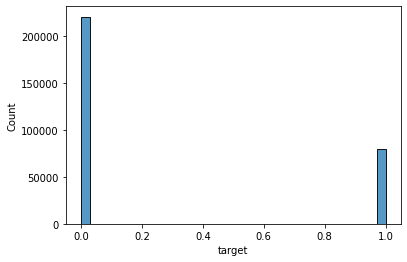

In [49]:
b

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [56]:
new_X

,0,1,2,3,4,5,6,7,8,9,...,473,474,cont0,cont1,cont3,cont4,cont5,cont6,cont8,cont9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.629858,0.855349,0.795549,0.681917,0.621672,0.592184,0.815254,0.965006
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.370727,0.328929,0.541366,0.388982,0.357778,0.600044,0.399353,0.927406
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.502272,0.322749,0.616352,0.793687,0.552877,0.352113,0.412303,0.292696
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.934242,0.707663,0.807807,0.800032,0.619147,0.221789,0.633669,0.760318
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.254427,0.274514,0.277308,0.610578,0.128291,0.578764,0.351103,0.357084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.681700,0.500730,0.671927,0.390566,0.145840,0.262767,0.519340,0.617436
299996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.489226,0.790664,0.620356,0.384891,0.735879,0.547731,0.470575,0.275743
299997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.487882,0.522347,0.232436,0.832482,0.810663,0.596939,0.373997,0.518024
299998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.331900,0.812891,0.630708,0.346898,0.735147,0.563488,0.680430,0.318453


In [62]:
X_train_new, y_train_new = sm.fit(new_X, y_train.ravel())

TypeError: cannot unpack non-iterable SMOTE object

## Baseline Model 

In [66]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # explicit class import from module
from sklearn.model_selection import GridSearchCV

In [67]:
log = LogisticRegression(max_iter=1000)

In [68]:
X_train = new_X

In [70]:
from sklearn.model_selection import cross_val_score 

cv_results = cross_validate(log, X_train, y_train, scoring= "f1", cv=3)

In [71]:
cv_results

{'fit_time': array([60.91937423, 69.49084282, 84.53695345]),
 'score_time': array([0.1467855 , 0.17861724, 0.20169687]),
 'test_score': array([0.67443129, 0.670535  , 0.67297138])}

In [72]:
cv_results['test_score'].mean()

0.6726458908673484

## Feature permutation

In [ ]:
from sklearn.inspection import permutation_importance

log_model = log.fit(X_train, y_train) # Fit model

permutation_score = permutation_importance(log_model, X_train, y_train, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

In [ ]:
X = X.drop(columns=['WHATEVER COLUMNS']) # Drops weak features

log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X, y, cv=10)

scores.mean()

# Modeling

## XGBoost

In [ ]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
!pip install xgboost

In [ ]:
data_test = pd.read_csv('raw_data/test.csv')

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model=SGDClassifier()

In [ ]:
cv_result=cross_validate(model, new_data, y, cv=5) 

In [ ]:
cv_result['test_score'].mean()

In [ ]:
cross_val_score(model, new_data, y, scoring="f1", cv = 7).mean()

## Test Set

In [ ]:
test_enc=ohe.transform(data_test[cat_cols]).toarray()
data_test[cat_cols]=test_enc
model.predict(test)